In [12]:
import numpy as np
from scipy.optimize import minimize

In [52]:
def f(x, A, x0, y0, sigma_x, sigma_y):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    return A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))

FOV_range = 10
scale_resolution = .1
x = np.arange(-FOV_range, FOV_range, scale_resolution)
y = np.arange(-FOV_range, FOV_range, scale_resolution)
x0 = 0
y0 = 0
sigx = 1
sigy = 1
A = (1. / (2 * np.pi*sigx*sigy))
Xg, Yg = np.meshgrid(x, y)
Z = f([Xg, Yg], A, 0, 0, sigx, sigy)


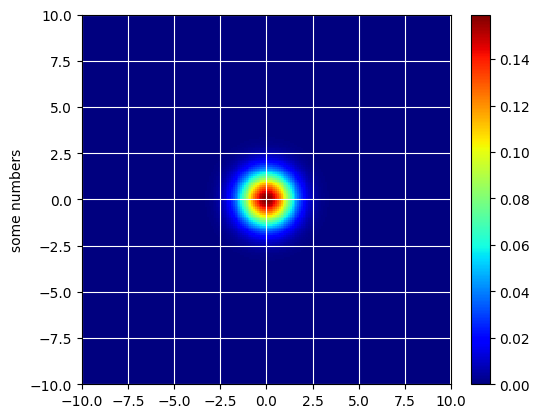

In [53]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig = figure()
ax = fig.add_subplot(1,1,1)
box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
im = ax.imshow(Z, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
# im = ax.imshow(Z, interpolation="none", origin='lower', cmap='jet')
# ax.contour(Xg, Yg, Z, levels=[A/np.e**0.5], colors="k", extent=box)
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# ax.scatter(x0, y0)
ax.grid(color='w')
# plt.plot(wp_X, wp_Y, 'x-', color='orange')
plt.ylabel('some numbers')
plt.axis([-FOV_range, FOV_range, -FOV_range, FOV_range])
plt.show()

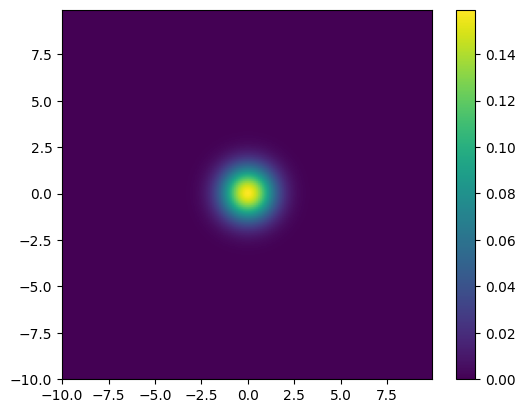

In [19]:
plt.figure()
box = (x.min(), x.max(), y.min(), y.max())   # left, right, bottom, top
# plt.imshow(Z, interpolation="none", origin='lower', extent=box, cmap='jet')
plt.imshow(Z, extent=box, origin="lower")
plt.colorbar()

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.079850348624873e-06
        x: [ 3.655e-08  4.879e+00]
      nit: 13
      jac: [-1.279e-13 -5.268e-06]
 hess_inv: [[ 1.000e+00  1.401e-04]
            [ 1.401e-04  1.443e+04]]
     nfev: 45
     njev: 15
[3.65481368e-08 4.87869061e+00]


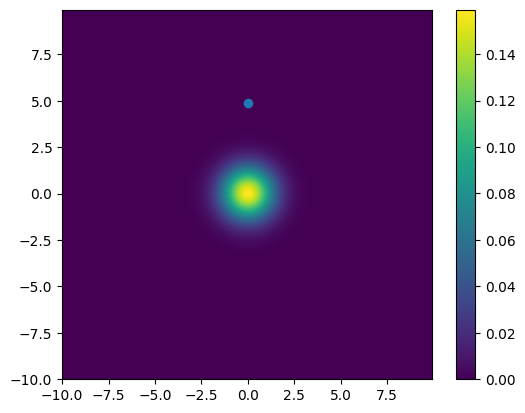

In [51]:
from scipy import optimize

x_min = optimize.minimize(f, [0, 1], args=(A, x0, y0, sigx, sigy))
print(x_min)
plt.figure()
# Show the function in 2D
plt.imshow(Z, extent=box, origin="lower")
plt.colorbar()
# And the minimum that we've found:
print(x_min.x)
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 8.833194595028214e-07
       x: [ 4.093e-08 -4.920e+00]
     nit: 13
     jac: [-2.132e-13  8.847e-06]
    nfev: 40
    njev: 13
[ 4.09259922e-08 -4.91969549e+00]


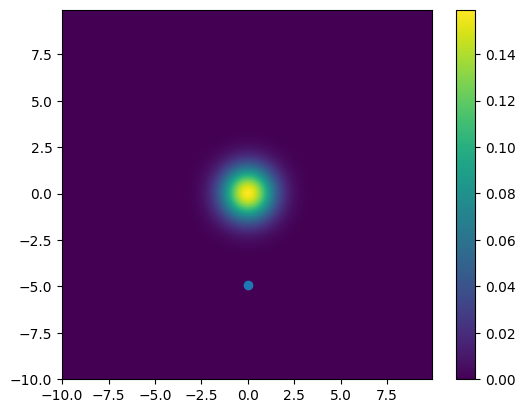

In [63]:
from scipy.optimize import NonlinearConstraint

C3 = NonlinearConstraint(lambda x : np.linalg.norm(x), 0, np.inf)


import scipy.optimize as opt

sol = opt.minimize(f, [0,-1], args=(A, x0, y0, sigx, sigy), constraints=(C3,))
# sol = opt.minimize(f, [1, 1], args=(A, x0, y0, sigx, sigy))
print(sol)
# Show the function in 2D
plt.imshow(Z, extent=box, origin="lower")
plt.colorbar()
# And the minimum that we've found:
print(sol.x)
plt.scatter(sol.x[0], sol.x[1])

plt.show()